In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as se
from sklearn.model_selection import train_test_split


%matplotlib inline

data = pd.read_csv('training.csv')
data = data.drop('Unnamed: 0', axis=1)

data = data.fillna(data.mean())

# Separating train and test samples by 30 for the testing 

X = data [['RevolvingUtilizationOfUnsecuredLines', 'age',
          'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfDependents']]
y = data [['SeriousDlqin2yrs']]

In [29]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn import linear_model


RANDOM_STATE = 42
FIG_SIZE = (10, 7)


# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)
# GNB Modeling
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf_GNB = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf_GNB.fit(X_train, y_train)
pred_test = unscaled_clf_GNB.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf_GNB = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf_GNB.fit(X_train, y_train)
pred_test_std = std_clf_GNB.predict(X_test)


#Linear 
# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA (GNB model)')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA (GNB model)')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf_GNB.named_steps['pca']
pca_std = std_clf_GNB.named_steps['pca']

# Show first principal componenets
#print('\nPC 1 without scaling:\n', pca.components_[0])
#print('\nPC 1 with scaling:\n', pca_std.components_[0])

/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/faris/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Prediction accuracy for the normal test dataset with PCA (GNB model)
93.38%


Prediction accuracy for the standardized test dataset with PCA (GNB model)
93.32%



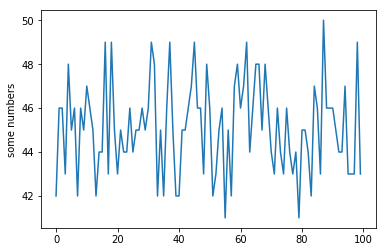

In [32]:
import numpy as np
import matplotlib.pyplot as plt


n, p = 50, 0.9  # number of trials, probability of each trial
s = np.random.binomial(n, p, 100)

plt.plot(s)
plt.ylabel('some numbers')
plt.show()

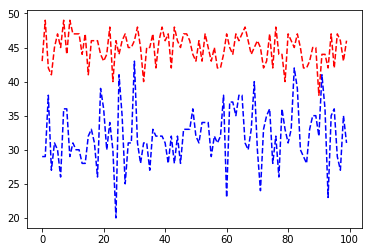

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.random.binomial(70, 0.45, 100)

# red dashes, blue squares and green triangles
plt.plot(s, 'r--', t, 'b--')
plt.show()